# <center>Metody Numeryczne</center>

# Laboratorium 7: Pierwiastki wielomianu i wartości własne


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań nieliniowych. W związku z tym podczas zajęć będziemy rozważać następujący problem:

Dana jest funkcja $f(x)$. Należy wyznaczyć takie jej argumenty $x^*$, dla których zachodzi równość $f(x^*) = 0$. 

Argumenty spełniające powyższe równanie nazywane są *pierwiastkami równania*.

<br>

**Wielomian**

Dany jest wielomian $w(x)$ w postaci kanonicznej (ogólnej):

$$
w(x) = a_nx^n + a_{n-1}x^{n-1} + \ldots + a_2x^2 + a_1x + a_0
$$

jego wektor współczynników wyraża się wzorem:

$$
\mathbf{a} = (a_0, a_1, ..., a_{n-1}, a_n)
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`,
    - `nppoly` - `numpy.polynomial.polynomial`.

---

In [2]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as nppoly

---

### **Zadanie 1.**

Dane są wielomiany w postaci iloczynowej:
$$
\begin{align*}
w_1(x) &= (x-1)(x-2)(x-3)\\
w_2(x) &= (x-1)(x-2) \cdot \ldots \cdot (x-20)
\end{align*}
$$

**Punkt 1.**

1. Oblicz wektor współczynników $\mathbf{a}_1$ wielomianu $w_1(x)$ w postaci kanonicznej dla zadanego wektora pierwiastków.

2. Sprawdź poprawność wyznaczonego wektora z definicją w sekcji **Cel zajęć**.

> **Wskazówka:** Użyj funkcji [`nppoly.polyfromroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyfromroots.html).

<br>

**Punkt 2.**

Zaimplementuj funkcję *`roots_20()`* wyznaczającą miejsca zerowe wielomianu na podstawie jego wektora współczynników. Funkcja powinna najpierw lekko zaburzać wejściowe współczynniki za pomocą dodania do nich losowej wartości postaci: $N(0,1) \cdot 1\mathrm{e}{-10}$.

> **Wskazówka:** Użyj funkcji [`np.random.random_sample()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random_sample.html) oraz [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

1. Wyznacz wektor współczynników $\mathbf{a}_2$ wielomianu $w_2(x)$.

2. W pętli 20 iteracji:
    
    1. Wyznacz pierwiastki zaburzonego wielomianu używając *`roots_20()`*.

    2. Ustaw zaburzony wektor współczynników jako nowy wektor współczynników.

    3. Wyrysuj na jednym wykresie wyznaczone części rzeczywiste pierwiastków, a na drugim części urojone (w każdej iteracji dorysowuj pierwiastki na tym samym rysunku).

4. Określ, które pierwiastki są najbardziej wrażliwe na zaburzenia oraz opisz wnioski wynikające z utworzonego wykresu.

5. Zaproponuj sposób oszacowania uwarunkowania każdego z pierwiastków.


[-6. 11. -6.  1.]


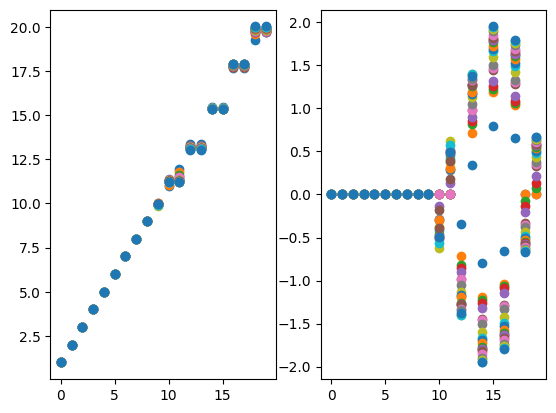

In [3]:
# ===== Twoja implementacja tutaj =====
w1_r = np.arange(1,4,1)
w2_r = np.arange(1,21,1)
an1 = np.polynomial.polynomial.polyfromroots(w1_r)
print(an1)

an2 = np.polynomial.polynomial.polyfromroots(w2_r)
pierwiastki = []
plt.figure
for i in range(21):
    zaburz, pierw = main.roots_20(an2)
    an2 = zaburz
    plt.subplot(1,2,1)
    plt.plot(np.real(pierw), "o")
    plt.subplot(1,2,2)
    plt.plot(np.imag(pierw), "o")

Kod bada stabilność numeryczną wielomianu Wilkinsona poprzez iteracyjne wprowadzanie losowych zaburzeń do jego współczynników za pomocą funkcji roots_20. Funkcja ta dodaje do współczynników niewielki szum i wyznacza nowe miejsca zerowe, zwracając zarówno zaburzony wektor, jak i obliczone pierwiastki. W głównej pętli programu proces ten jest powtarzany 21 razy, przy czym w każdym kroku wektor współczynników jest nadpisywany nowym, zaburzonym wynikiem, co prowadzi do kumulacji błędu. Na każdym etapie obliczone pierwiastki są nanoszone na dwa oddzielne wykresy prezentujące ich części rzeczywiste oraz urojone. Pozwala to zaobserwować, jak nawet minimalne zmiany współczynników powodują drastyczne przesunięcia miejsc zerowych, szczególnie tych o większych wartościach. Całość obrazuje zjawisko złego uwarunkowania zadania poszukiwania pierwiastków wielomianu wysokiego stopnia w bazie potęgowej.

---

### **Zadanie 2.**

Na podstawie wiedzy z wykładu wiadomo, że wartości własne macierzy kwadratowej są pierwiastkami wielomianu charakterystycznego tej macierzy oraz, że każdy wielomian posiada swoją macierz stowarzyszoną (macierz Frobeniusa). Wynika z tego, że **poszukiwanie pierwiastków wielomianu jest równoważne poszukiwaniu wartości własnych macierzy stowarzyszonej**.

<br>

Dany jest wielomian:
$$
w_3(x) = (x-1)^8
$$ 

Należy wyznaczyć numerycznie jego miejsca zerowe na różne sposoby i porównać otrzymane wyniki z wartościami analitycznymi.

**Punkt 1.**

Przygotowanie macierzy stowarzyszonej.

1. Zaiplementuj funkcję *`frob_a()`* tworzącą [macierz Frobeniusa](https://en.wikipedia.org/wiki/Companion_matrix) dla zadanego wektora współczynników wielomianu.

2. Wyznacz macierz Frobeniusa $\mathbf{F_{w_3}}$ dla wielomianu $w_3(x)$.

<br>

**Punkt 2.**

Wyznaczenie pierwiastków wielomianu.

1. Wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$ za pomocą funkcji [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html).  

2. Dokonaj rozkładu Schura macierzy $\mathbf{F_{w_3}}$ i na tej podstawie wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$. Użyj funkcji [`sp.linalg.schur()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.schur.html).

3. Wyznacz pierwiastki wielomianu $w_3(x)$ przy użyciu funkcji [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

Zestawienie wyników.

1. Utwórz wykres typu *scatter plot* i wyrysuj na nim wartości pierwiastków wyznaczonych w **Punkcie 2.** oraz pierwiastki oblicznone analitycznie na płaszczyźnie zespolonej.

2. Opisz wnioski wynikające z wykresu.

[[ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.]
 [-1. -1. -1. -1. -1. -1. -1.]]
[ 7.07106781e-01+0.70710678j  7.07106781e-01-0.70710678j
  2.77555756e-16+1.j          2.77555756e-16-1.j
 -1.00000000e+00+0.j         -7.07106781e-01+0.70710678j
 -7.07106781e-01-0.70710678j]
[ 7.07106781e-01+0.70710678j  7.07106781e-01-0.70710678j
  2.77555756e-16+1.j          2.77555756e-16-1.j
 -1.00000000e+00+0.j         -7.07106781e-01+0.70710678j
 -7.07106781e-01-0.70710678j]
[0.97789688-0.00901967j 0.97789688+0.00901967j 0.99051571-0.02210196j
 0.99051571+0.02210196j 1.00901686-0.02256938j 1.00901686+0.02256938j
 1.02257054-0.00948709j 1.02257054+0.00948709j]


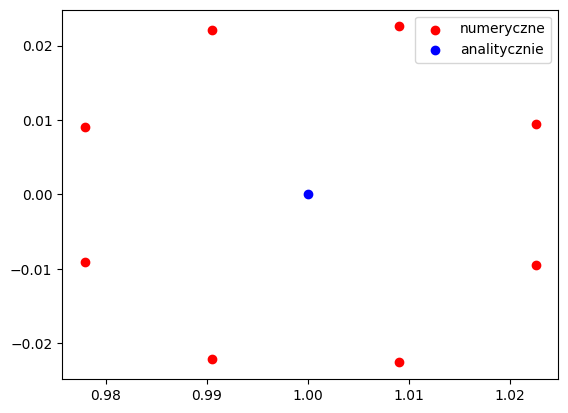

In [4]:
# ===== Twoja implementacja tutaj =====
#Punkt 1
mz_w3 = np.array([1,1,1,1,1,1,1,1])
Fw3 = main.frob_a(mz_w3)
print(Fw3)

#Punkt 2
Ww = np.linalg.eigvals(Fw3)
print(Ww)

T,Z = sp.linalg.schur(Fw3)
Ww2 = np.linalg.eigvals(T)
print(Ww2)

wspolczynniki = np.polynomial.polynomial.polyfromroots(mz_w3)
pierw = np.polynomial.polynomial.polyroots(wspolczynniki)
print(pierw)

#Punkt 3
plt.figure()
plt.scatter(np.real(pierw), np.imag(pierw), color="red", label="numeryczne")
plt.scatter(1,0, color="blue", label="analitycznie")
plt.legend()


Kod implementuje funkcję tworzącą macierz Frobeniusa i wykorzystuje ją do analizy numerycznej wielomianu posiadającego osiem pierwiastków równych jeden. Następnie wyznaczane są rozwiązania tego problemu trzema metodami numerycznymi, czyli poprzez obliczenie wartości własnych macierzy Frobeniusa funkcją eigvals, z wykorzystaniem rozkładu Schura oraz bezpośrednio funkcją polyroots. W celu weryfikacji dokładności obliczeń wyniki te są wizualizowane na wykresie punktowym na płaszczyźnie zespolonej. Zestawienie rozwiązań numerycznych z pojedynczym punktem analitycznym pozwala zaobserwować błędy zaokrągleń, które w przypadku pierwiastka wielokrotnego tworzą charakterystyczny okrąg wokół poprawnego wyniku.

---

### **Zadanie 3.**

Dany jest wielomian:
$$
w_4(x) = 243x^7 - 486x^6 + 783x^5 - 990x^4 + 558x^3 - 28x^2 - 72x + 16
$$ 

1. Wyznacz numerycznie miejsca zerowe wielomianu $w_4(x)$ w sposób analogiczny jak w **Zadaniu 2.**

2. Wyrysuj na płaszczyźnie zespolonej wyznaczone pierwiastki oraz pierwiastki wyliczone analitycznie.

3. Porównaj otrzymane wyniki z rezulatatami otrzymanymi w **Zadaniu 2.**

>**Wskazówka:** Sprawdź poprawność wyznaczonego wektora współczynników z definicją w sekcji **Cel zajęć**.

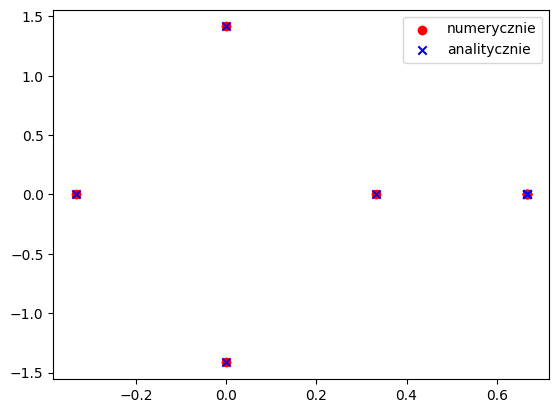

In [29]:
# ===== Twoja implementacja tutaj =====
roots = np.array([243, -486, 783, -990, 558, -28, -72, 16])
roots1 = roots[::-1]
roots2 = nppoly.polyroots(roots1)

plt.figure()
plt.scatter(np.real(roots2), np.imag(roots2), color="red", label='numerycznie')
roots_analytic = [
    2/3,
    2/3,
    2/3,
    1/3,
    -1/3,               
    1j*np.sqrt(2),
    -1j*np.sqrt(2)           
]
ana_real = [np.real(r) for r in roots_analytic]
ana_imag = [np.imag(r) for r in roots_analytic]

plt.scatter(ana_real, ana_imag, color='blue', marker='x', label='analitycznie')
plt.legend()

Kod definiuje wektor współczynników wielomianu i dostosowuje ich kolejność do wymagań biblioteki numerycznej poprzez odwrócenie tablicy. Następnie za pomocą funkcji polyroots wyznaczane są przybliżone miejsca zerowe, które zostają naniesione na wykres płaszczyzny zespolonej jako czerwone punkty, a w celu weryfikacji zaznaczono również niebieskimi krzyżykami rozwiązania analityczne. W porównaniu do poprzedniego zadania, gdzie dla pierwiastka ośmiokrotnego błędy tworzyły duży okrąg, tutaj dla pierwiastków pojedynczych rozwiązania numeryczne pokrywają się idealnie z analitycznymi. Jedynie dla pierwiastka wielokrotnego obserwujemy charakterystyczny rozrzut punktów, co potwierdza, że algorytmy numeryczne zachowują wysoką precyzję dla pierwiastków jednokrotnych, a tracą stabilność głównie przy wysokiej krotności miejsca zerowego.

---

### **Zadanie 4.**

Zadanie polega na przeanalizowaniu w jaki sposób różne przekształcenia macierzy wpływają na pojawianie się błędów numerycznych.

W celu przeprowadzenia analizy skonstruuj trzy macierze diagonalne $\mathbf{A}_n$ dla $n = \{10,20,30\}$. Współczynniki macierzy powinny być zdefiniowane jako $a_{ii} = 2^i$ dla $i = \{1,2,...,n\}$ (skorzystaj z funkcji [`np.diag()`](https://numpy.org/doc/stable/reference/generated/numpy.diag.html)).

**Punkt 1.**

1. Dla każdej z macierzy $\mathbf{A}_n$ oblicz wartości własne przy użyciu [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html) i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 2.**

1. Zdefiniuj funcję *`is_nonsingular()`* sprawdzającą czy zadana macierz nie jest singularna. 

2. Skonstruuj losowe niesingularne macierze wektorów własnych $\mathbf{P}_n$, których wartości współczynników są liczbami całkowitymi z zakresu $(0,100)$. Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{P}_n$ oblicz macierze $\mathbf{B}_n$ postaci: 
$$
\mathbf{B}_n = \mathbf{P}_n\mathbf{A}_n\mathbf{P}_{n}^{-1}
$$ 

3. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{B}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

>**Wskazówka:** Niesingularność macierzy $\mathbf{P}_n$ można zapewnić generując je w pętli, w której warunkiem stopu będzie wynik funkcji zaimplementowanej w **Podpunkcie 1.**

<br>

**Punkt 3.**

1. Bazując na macierzach $\mathbf{P}_n$ wygeneruj macierze ortogonalne $\mathbf{Q}_n$ (można do tego użyć rozkładu QR). Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{Q}_n$ oblicz macierze $\mathbf{C}_n$ postaci:
$$
\mathbf{C}_n = \mathbf{Q}_n\mathbf{A}_n\mathbf{Q}_{n}^{-1}
$$

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{C}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 4.**

1. Bazując na analitycznych wartościach własnych dla wielomianów charakterystycznych macierzy $\mathbf{A}_n$ wygeneruj macierze Frobeniusa $\mathbf{F}_n$ korzystając z funkcji zaimplementowanej w **Zadaniu 2.** 

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{F}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 5.**

Porównaj wyniki otrzymane we wszystkich punktach. Opisz z czego wynikają powstałe błędy obliczeń.

In [28]:
# ===== Twoja implementacja tutaj =====
n_values = [10,20,30]

for idx, param in enumerate(n_values):
    x = []
    for i in range(1,param+1):
        x.append(2**i)
    A = np.diag(x)
    W_A = np.linalg.eigvals(A)
    vals_A = np.sort(np.real(W_A))

    diff_A = np.abs(vals_A - x)
    max_err_A = np.max(diff_A)
    mean_err_A = np.mean(diff_A)

    while True:
        candidate_P = np.random.randint(0, 101, (param, param))
    
        if main.is_nonsingular(candidate_P):
            Pn = candidate_P
            break
    P_inv = np.linalg.inv(Pn)
    B = Pn @ A @ P_inv
    W_B = np.linalg.eigvals(B)
    vals_B = np.sort(np.real(W_B))

    diff_B = np.abs(vals_B - x)
    max_err_B = np.max(diff_B)
    mean_err_B = np.mean(diff_B)

    Qn, R = np.linalg.qr(Pn)
    Cn = Qn @ A @ Qn.T 
    W_C = np.linalg.eigvals(Cn)
    
    vals_C = np.sort(np.real(W_C))
    
    diff_C = np.abs(vals_C - x)
    max_err_C = np.max(diff_C)
    mean_err_C = np.mean(diff_C)

    coeffs = nppoly.polyfromroots(x)
    F = main.frob_a(coeffs)
    
    vals_F = np.linalg.eigvals(F)
    vals_F = np.sort(np.real(vals_F))
    
    diff_F = np.abs(vals_F - x)
    max_err_F = np.max(diff_F)
    mean_err_F = np.mean(diff_F)
    
    print(f"{'A_' + str(i) + ' (diag)':<25} {max_err_A:<20.2e} {mean_err_A:<20.2e}")
    print(f"{'B_' + str(i) + ' (P*A*P^-1)':<25} {max_err_B:<20.2e} {mean_err_B:<20.2e}")
    print(f"{'C_' + str(i) + ' (Q*A*Q^T)':<25} {max_err_C:<20.2e} {mean_err_C:<20.2e}")
    print(f"{'F_' + str(i) + ' (Frobenius)':<25} {max_err_F:<20.2e} {mean_err_F:<20.2e}")
    print()


    

A_10 (diag)               0.00e+00             0.00e+00            
B_10 (P*A*P^-1)           2.37e-12             8.78e-13            
C_10 (Q*A*Q^T)            9.09e-13             1.72e-13            
F_10 (Frobenius)          1.82e-12             3.37e-13            

A_20 (diag)               0.00e+00             0.00e+00            
B_20 (P*A*P^-1)           5.19e-09             2.36e-09            
C_20 (Q*A*Q^T)            1.63e-09             1.41e-10            
F_20 (Frobenius)          2.24e-09             5.63e-10            

A_30 (diag)               0.00e+00             0.00e+00            
B_30 (P*A*P^-1)           1.03e-05             3.87e-06            
C_30 (Q*A*Q^T)            8.34e-07             6.47e-08            
F_30 (Frobenius)          1.06e+09             7.05e+07            



**Przykładowa forma zestawienia wyników:**
```python
for i, n in enumerate(n_values):
    print(f"   {'Macierz':<18} {'Błąd maksymalny':<18} {'Błąd średni':<18}")
    print(f"   {'-'*55}")
    print(f"   {'A_' + str(n) + ' (diag)':<18} {max_error_A[i]:<18.2e} {mean_error_A[i]:<18.2e}")
    print(f"   {'B_' + str(n) + ' (P*A*P^-1)':<18} {max_error_B[i]:<18.2e} {mean_error_B[i]:<18.2e}")
    print(f"   {'C_' + str(n) + ' (Q*A*Q^T)':<18} {max_error_C[i]:<18.2e} {mean_error_C[i]:<18.2e}")
    print(f"   {'F_' + str(n) + ' (Frobenius)':<18} {max_error_F[i]:<18.2e} {mean_error_F[i]:<18.2e}\n")
```

**Rezultat:**
```md
   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_10 (diag)        0.00e+00           0.00e+00          
   B_10 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_10 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_10 (Frobenius)   0.00e+00           0.00e+00          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_20 (diag)        0.00e+00           0.00e+00          
   B_20 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_20 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_20 (Frobenius)   0.00e+00           0.00e+00          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_30 (diag)        0.00e+00           0.00e+00          
   B_30 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_30 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_30 (Frobenius)   0.00e+00           0.00e+00
```

Kod analizuje stabilność numeryczną wyznaczania wartości własnych dla macierzy o różnych strukturach, porównując wyniki numeryczne z wartościami analitycznymi dla wymiarów 10, 20 i 30. Zdecydowanie najmniejsze błędy, bliskie precyzji maszynowej, uzyskano dla macierzy diagonalnej A oraz macierzy C powstałej przez transformację ortogonalną, co wynika z idealnego uwarunkowania macierzy obrotu niepowiększającej błędów numerycznych. W przypadku macierzy B błędy są zauważalnie większe, co jest efektem mnożenia przez losową macierz przejścia i jej odwrotność, które często są gorzej uwarunkowane i wzmacniają niedokładności arytmetyki zmiennoprzecinkowej. Najgorsze rezultaty, prowadzące do całkowitej utraty dokładności dla dużych wymiarów, odnotowano dla macierzy Frobeniusa F, co jest bezpośrednim skutkiem skrajnej niestabilności numerycznej związanej z przechodzeniem między pierwiastkami a współczynnikami wielomianu w bazie potęgowej.

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)